# 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
O_height=pd.read_csv('o_height.csv')
h=O_height['hight']

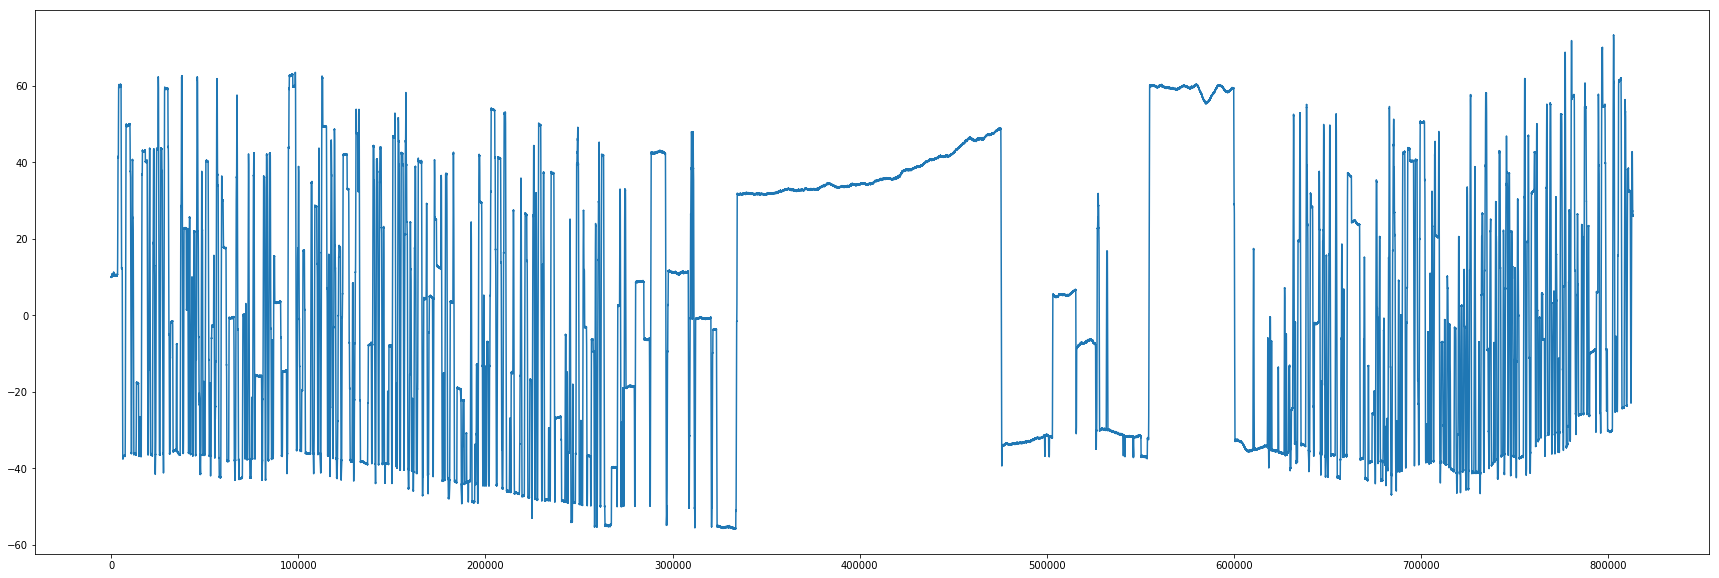

In [3]:
plt.figure(figsize=(30,10))
plt.plot(h[:])

# 高通滤波

In [4]:
change_h=[]
change_h_index=[]
for i in range(len(h)-10):
    if abs(h[i+10]-h[i])>0.6:  
        change_h.append(h[i+1])
        change_h_index.append(i+1)

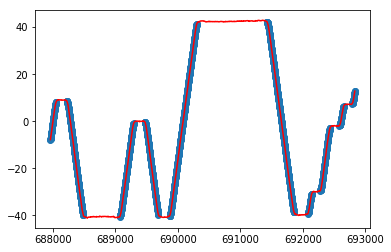

In [9]:
def Plot(x,y):
    #plt.figure(figsize=(30,10))
    plt.scatter(change_h_index[x:y],change_h[x:y])
    plt.plot(h[change_h_index[x]:change_h_index[y]],color='red')
Plot(111000,113000)

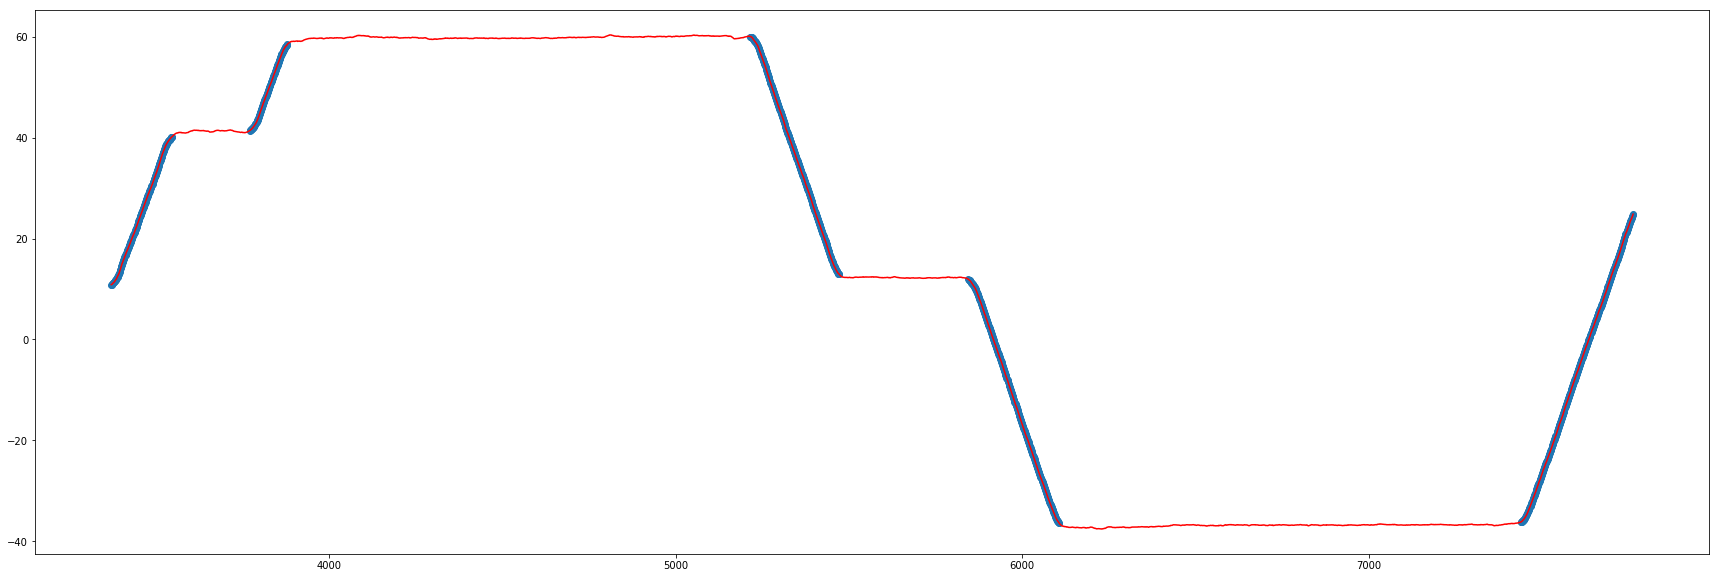

In [8]:
Plot(0,1130)

# 提取各个运动过程

In [10]:
result=[]
sub_result=[]
result_index=[]
sub_result_index=[]
for i in range(len(change_h)-1):
    if abs(change_h_index[i+1]-change_h_index[i])<30:
        sub_result.append(change_h[i])
        sub_result_index.append(change_h_index[i])
    else:
        sub_result.append(h[change_h_index[i]+20])
        sub_result_index.append(change_h_index[i]+20)
        #不做延迟
        #sub_result.append(change_h[i])
        #sub_result_index.append(change_h_index[i])
        
        a=copy.deepcopy(sub_result)
        b=copy.deepcopy(sub_result_index)
        result.append(a)
        result_index.append(b)
        sub_result.clear()
        sub_result_index.clear()

### 删除扰动

In [12]:
for i in range(len(result)):
    if abs(result[i][-1]-result[i][0])<1.5:
        result.remove(result[i])
        result_index.remove(result_index[i])
        print(result_index[i])

In [13]:
j=-1
for i in result:
    j=j+1
    if abs(i[-1]-i[0])<1.5:
        print(i)
        print(j)

In [14]:
for i in range(len(result)):
    if not len(result[i])==len(result_index[i]):
        print(i)

In [15]:
re_res=[]
re_res_index=[]
for i in range(len(result)):
    for j in range(len(result[i])):
        re_res.append(result[i][j])
        re_res_index.append(result_index[i][j])

In [16]:
def Plot1(x,y):
    plt.figure(figsize=(30,10))
    plt.scatter(re_res_index[x:y],re_res[x:y])
    plt.plot(h[re_res_index[x]:re_res_index[y]],color='red')

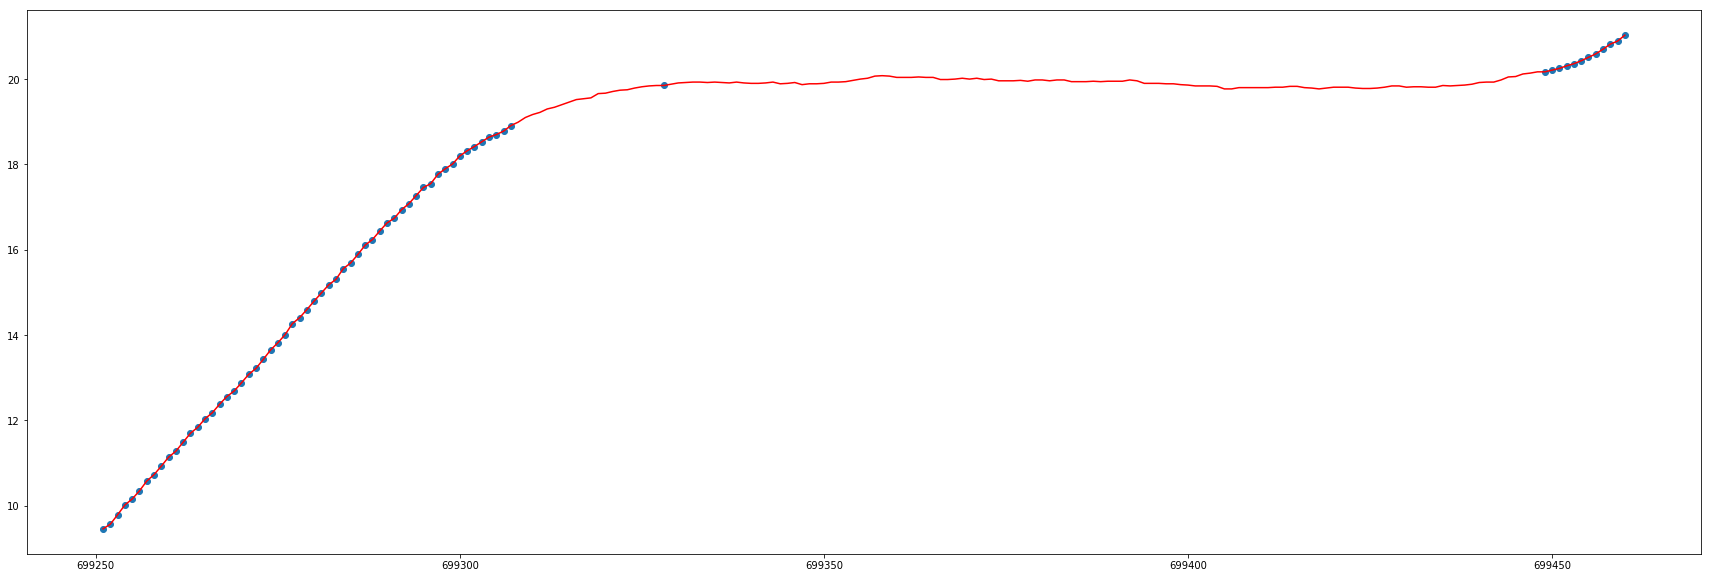

In [17]:
s=1000
i=115
Plot1(114730,114800)


# 重建电梯运动过程

In [18]:
d_h=[]
index=[0,]
for i in result:
    d_h.append(i[-1]-i[0])
for j in result_index:
    index.append(j[0])
    index.append(j[-1])
    
remain_count=[]
for i in range(0,len(index)-1,2):
    remain_count.append(index[i+1]-index[i])
    
acc_count=[]
for i in range(1,len(index),2):
    acc_count.append(index[i+1]-index[i])
    
diff=list(np.array(d_h)/np.array(acc_count))

start=result[0][0]
r_h=[start,]
for i in range(len(acc_count)):
    for j in range(2):
        if j==0:
            for k in range(remain_count[i]):
                r_h.append(start)
        if j==1:
            for l in range(acc_count[i]):
                start=start+diff[i]
                r_h.append(start)

# d_f分析


In [100]:
diff_save=pd.DataFrame(columns=['dff'])
diff_save['diff']=d_h
diff_save.to_csv('diff.csv',index=False,header=True)

In [26]:
start_floor=15
floor_squ=[start_floor,]
flag=1
next_floor=0
for i in d_h:
    if flag==1:
        flag=0
        floor=start_floor
        if floor>1 and i>0:
            next_floor=floor+int((i+1)/3)
        elif floor>1 and i<0:
            if abs(i)<=(floor-3)*3+6:
                next_floor=floor+int((i-1)/3)
            else:
                diff=-i-(floor-3)*3
                if diff<15:
                    next_floor=1
                else:
                    next_floor=-1
        elif floor==1 and i >12:
            next_floor=3+int((i-12)/3)
        elif floor==1 and 0<i<11:
            next_floor=2
        elif floor==1 and i<0:
            next_floor=-1
        elif floor==-1 and i >=10:
            next_floor=3+int((i-16)/3)
        elif floor==-1 and 0<i<10:
            next_floor=1
        floor_squ.append(next_floor)
              
    else:
        floor=next_floor
        if floor>1 and i>0:
            next_floor=floor+int((i+1)/3)
        elif floor>1 and i<0:
            if abs(i)<=(floor-3)*3+6:
                next_floor=floor+int((i-1)/3)
            else:
                diff=-i-(floor-3)*3
                if diff<15:
                    next_floor=1
                else:
                    next_floor=-1
        elif floor==1 and i >12:
            next_floor=3+int((i-12)/3)
        elif floor==1 and 0<i<11:
            next_floor=2
        elif floor==1 and i<0:
            next_floor=-1
        elif floor==-1 and i >=10:
            next_floor=3+int((i-16)/3)
        elif floor==-1 and 0<i<10:
            next_floor=1
        floor_squ.append(next_floor)
    

In [34]:
floor_save=pd.DataFrame(columns=['floor'])
floor_save['floor']=floor_squ
#floor_save.to_csv('floor_save.csv',index=False,header=True)

In [49]:
index.append(len(h))

In [27]:
floor_squ[400]=2
floor_squ[303]=2

In [50]:
floor_re=[]
h_re=[]
for  i in range(len(floor_save)):
    for j in range(index[2*i],index[2*i+1]):
        floor_re.append(floor_squ[i])
        h_re.append(h[j])

In [51]:
Map=[13.5,18,27.5,31,]
for i in range(34,119,3):
    Map.append(i)

In [52]:
hh=[]
for i in floor_re:
    if i==-1:
        hh.append(Map[0])
    else:
        hh.append(Map[i])

In [53]:
d=np.array(h_re)-np.array(hh)+10

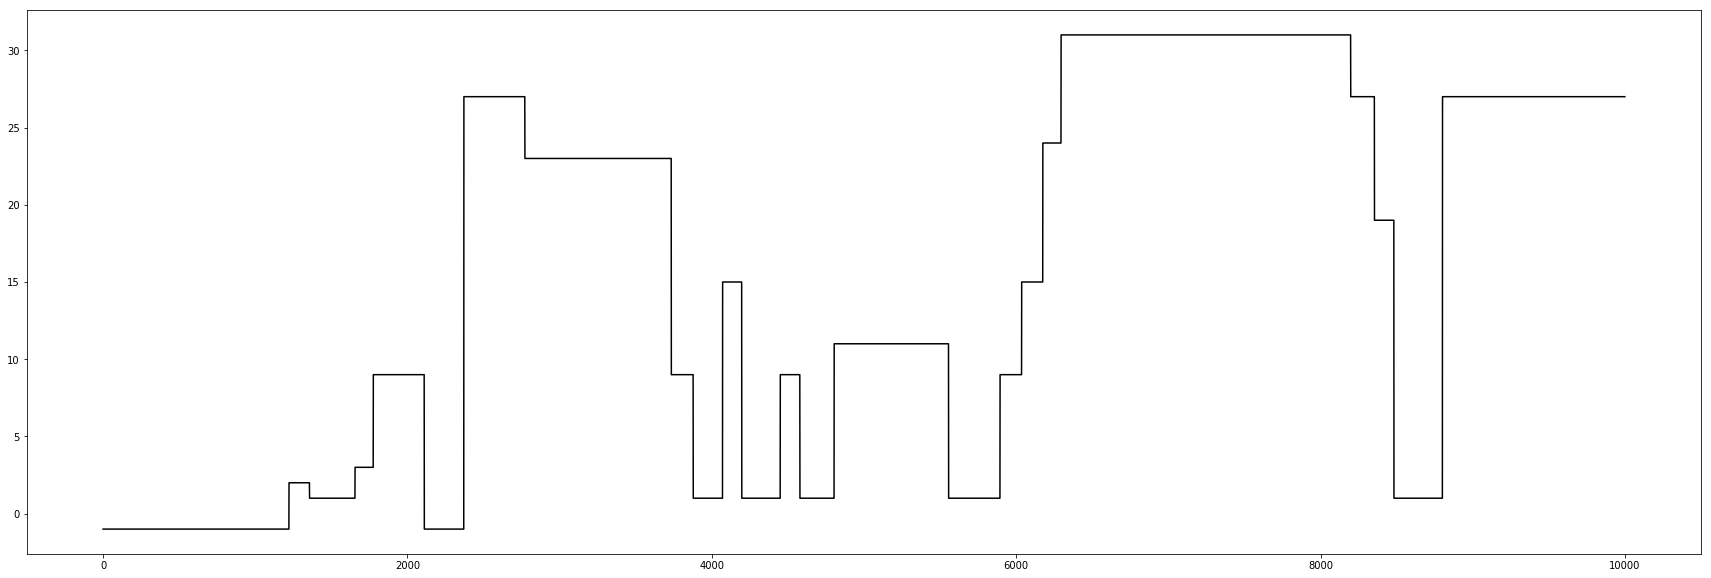

In [54]:
plt.figure(figsize=(30,10))
plt.plot(floor_re[130000:140000],color='k')

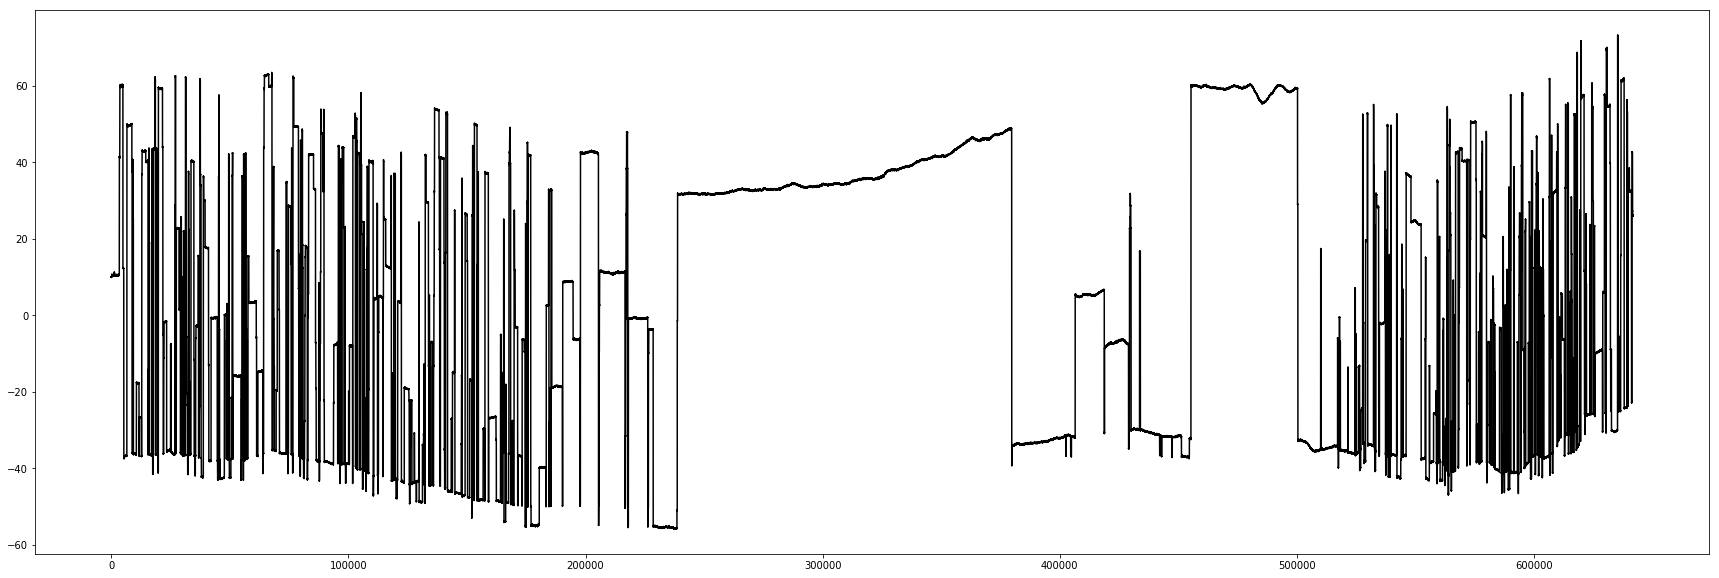

In [55]:
plt.figure(figsize=(30,10))
plt.plot(h_re,color='k')

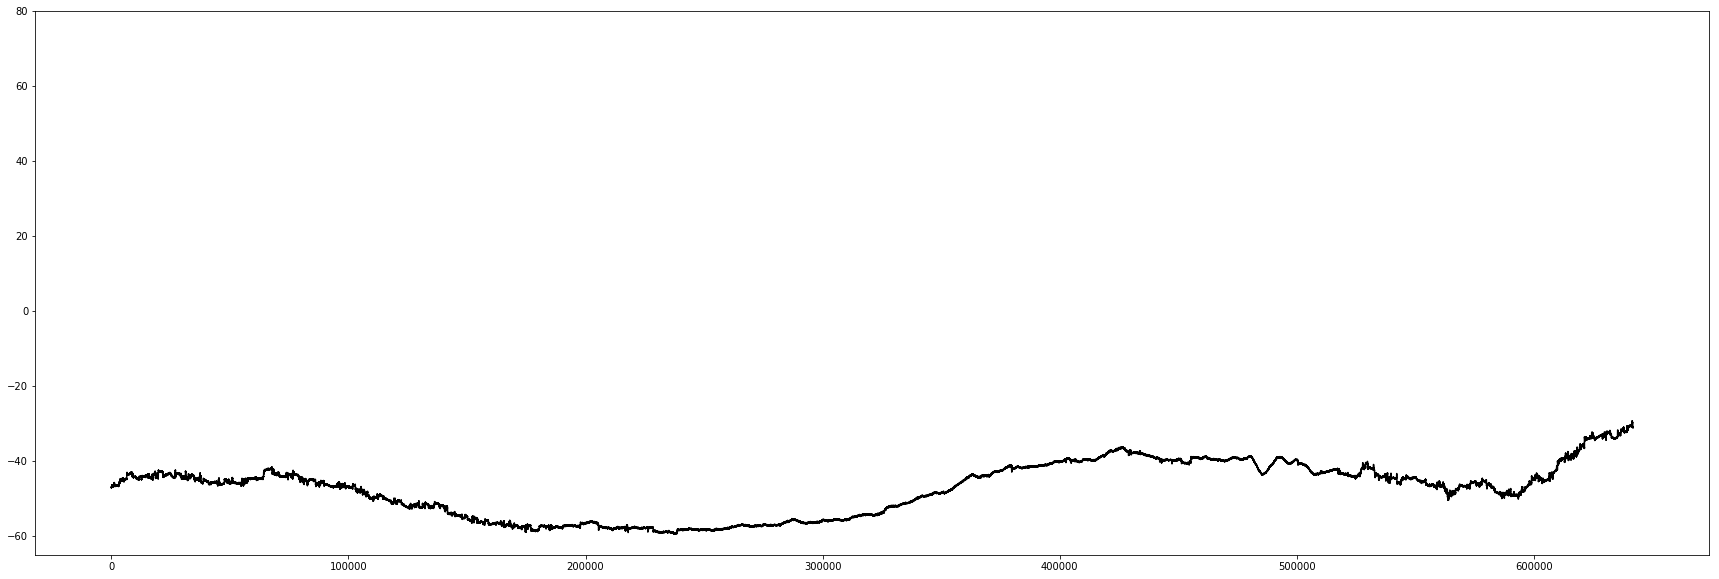

In [56]:
plt.figure(figsize=(30,10))
plt.ylim(-65,80)
plt.plot(d[:],color='k')

In [186]:
j=np.array(h_re)-np.array(d)+10

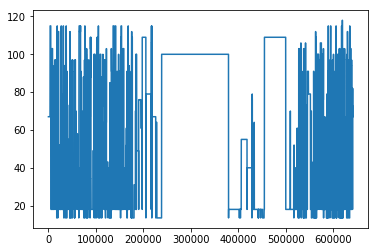

In [187]:
plt.plot(j)